### Preamble
#### Please read this text carefully before beginning
For the labs in this course, you should work with a partner, where the two of you share a single keyboard and screen. Each person needs to be responsible for making sure that both they and their partner understand what is going on. You should stay engaged with what your partner is doing and discuss what’s going on all times. That means:

- If you know the answer and your partner doesn’t, _don’t_ just type it in and move on to the next question--- explain what you have done and why. This not only helps your partner to learn, but will also clarify your own understanding. Consider whether you could give other examples that would help your partner understand even better, and ask if they are satisfied with your explanation. Being able to think around a concept and explain it well to other people is an important skill to learn, and not always easy.
- If your partner knows the answer and you don’t, _don’t_ let them move on until you understand too. And if you are at the keyboard, _don’t_ let them simply dictate what you should type if you don’t understand why. Do ask questions, and let your partner know if their explanation makes sense or not. Remember, just because they think they know the answer doesn’t necessarily mean they are right, and if it doesn’t make sense to you, they need to work harder at explaining (and maybe discover that they are wrong!)
- If neither of you knows the answer, ask your TA, and they can try to help you.
- If one person is much more familiar with Python than the other, consider putting the weaker person at the keyboard or at least switching frequently, so they will get more practice with basic coding skills.

### Coding guidelines
Make an effort to write well-structured and well-commented code. Your grader should be able to understand your code without too much effort. One line of comment for every line of code is not too much - ideally, even a person who does not know the programming language should be able to understand what is going on based on your comments. Your grader is allowed to remove up to two points out of every ten points, if your code is not readable. 


### Required software
Jupyter notebook:

**Easy installation**  The easiest way to get the required software is to install Anaconda. See https://www.continuum.io/downloads . It contains all required packages, including python and jupyter. You can choose python 2.7 or 3.5.

**Manual installation** Make sure that you have numpy and matplotlib installed. If you don't, you can use e.g. pip install <package> --user (python2) or pip3 install <package> --user (python3).

### Submission
Please submit your jupyter notebook **as a pair via Blackboard**. The deadline for submission is **Friday 9 23:59**.

### Start the notebook
Start a terminal, and cd into the directory where you saved the notebook. Then type jupyter notebook. Your web browser will open.


This week's preamble is quite long. From next week, there will be less reading and more doing!

## Exercise 1



This exercise is meant to help you get familiar with some language data, do some basic text-processing, and explore some concepts learnt in class. We will use two kinds of corpora in this exercise, the **Penn Treebank** corpus (newspaper text) and the **CHILDES** corpus (child language learning data), described below. For each of them,  take a few minutes to read the sentences/utterances before starting to program. Then, using Jupyter Notebook, write code to answer the given questions. We have included a number of additional (optional) questions at the end of in **Going Further**. If you finish the main questions, choose one of the additional ones to work on. **Total points: 10**





In [1]:
## if you need to download NLTK first, takes some time
import nltk
# nltk.download()

from nltk.corpus import treebank

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import string
import re
import glob

### Penn Treebank Corpus

The **Penn Treebank** is a collection of data from the newspaper _The Wall Street Journal_, of about 1 Million words (40K sentences).  This dataset is very commonly used to to train models in NLP systems. It also contains additional information like Part-of-Speech tags and syntactic trees, which has been removed for this exercise. (In later exercise we will use some of this information.) The dataset contains one sentence per line for this exercise.

(a) What are the total number of word tokens in this corpus? In this case, consider a word to be any string that is separated by whitespace. What are the total number of distinct word _types_?

In [33]:
words = []
with open('sec02-21.raw') as file:
    for line in file:
        lineWords = line.split(' ')
        lineWords = [w.strip('\n') for w in lineWords]        
        words.extend(lineWords)
    print "Words read:   ", len(words)
    print "Unique words: ", len(set(words))
    

Words read:    969156
Unique words:  44211


(b) In some cases, we don't want to consider punctuations the same way as other word tokens. Using regular expressions, remove punctuations from the corpus, and count the number of word tokens now.  What is the number of distinct word types?

In [37]:
r = re.compile('(.*[a-zA-Z]+|\d)')
filtered_words = filter(r.match, words)

print "Filtered words:        ",len(filtered_words)
print "Unique filtered words: ",len(set(filtered_words))

Filtered words:         823504
Unique filtered words:  44186


(c) In some cases, it might be useful to remove the distinction between upper-cased and lower-case words, for example, the two uses of _can_ in _Can you program in Python?_ and _I can program in Python_. Again using regular expressions, convert all words to lower-case, and now count the number of distinct word types in the corpus. 

In [40]:
print "Count before lowercase cast: ", len(filtered_words)
words = [word.lower() for word in filtered_words]
print "Count after lowercase cast: ", len(set(words))

Count before lowercase cast:  823504
Count after lowercase cast:  39360


(d) Plot a graph of word frequency versus rank of a word in this corpus (after removing punctuation and lower-casing). Does this corpus obey Zipf's law?

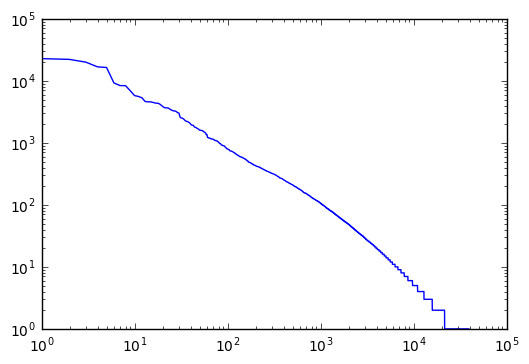

In [69]:
# Didn't use Counter because this is faster
word_count = {}
for word in words:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sort_vals = sorted(word_count.values(), reverse=True)
        
plt.loglog(sort_vals)

print "hoi"


(e) While processing the corpus as above, there may still be a few things that you don't consider real words. What are some of those things? [The question of what counts as a word and what doesn’t comes up a lot in NLP, and there is rarely a single correct answer; often we need to use our judgment and justify our decisions.]. Go back and remove some of these non-words, and re-plot the graph. 

(f) Assume that the probability $P(w_1^n)$ of a sentence $w_1 \ldots w_n$   can be calculated as follows:

$$P(w_1^n) = P(w_1) . P(w_2) \ldots P(w_n) $$

The probability of a word $w_i$ can be calculated from a corpus as $P(w_i) = count (w_i) / N$ where $N$ is the total number of word tokens in the corpus. 

What is the probability of the first two sentences in the corpus? 

(g) What is the average _sentence length_ of sentences in the Penn Treebank?

## CHILDES corpus
The second corpus contains data from CHILDES, the Child Language Data Exchange System. CHILDES is a large repository containing many different corpora in many different languages, all contributed by researchers interested in child language development. Since the particular interests of the different researchers vary consider- ably, the different corpora contain different types of data (transcriptions, audio, and/or video) and different kinds of annotations (ranging from detailed phonetic transcripts to morphological and syntactic annotations). However all the corpora are annotated using similar guidelines, so that tools can be developed to work with the annotations across different corpora.

We will use the Providence corpus for this lab. To download the corpus, click on the following URL or paste it into your web browser: http://homepages.inf.ed.ac.uk/sgwater/teaching/Providence.zip

(a) This corpus is contains very different data from the Penn Treebank. To get an idea of what is in the files, take a look at _eth01.cha_ by opening it in a text editor or using a unix command like _less_. What information is in the metadata at the top of each file? _(Hint: child language researchers use the format y;m.d to indicate a child's age in years;months.days)_

What do you see in the rest of the file? _Hint: the string of numbers at the end of each line is a code that links to a time point in the audio recording of this data. The audio isn't included here but can be obtained from the CHILDES database.)_

## Header

@UTF8

@Begin

@Languages:	eng

@Participants:	CHI Ethan Target_Child, MOT Mother Mother

@ID:	eng|Ethan|CHI|0;11.4|male|||Target_Child|||

@ID:	eng|Ethan|MOT|25;||||Mother|||

@Birth of CHI:	12-DEC-2000

@Birth of MOT:	16-NOV-1976

@Media:	eth01, audio

@Comment:	manuela barcelos

@Comment:	Language of Caregivers is Mother Standard American English (Midwest , Chicago)

Father Standard American English (originally from Brooklyn but speaks SAE)

@Date:	16-NOV-2001

*MOT:	you wanna sit with mommy ? 34413_37325

(b)  Actually, the _eth01.cha_ file is maybe not one of the more interesting ones. Take a look now at _eth50.cha_.
What are some of the main differences you see between the data in these two files? Is there an obvious explanation for those differences? 



## Header

@UTF8

@Begin

@Languages:	eng

@Participants:	CHI Ethan Target_Child, MOT Mother Mother, TOY Toy Toy

@ID:	eng|Ethan|CHI|1;1.5|male|||Target_Child|||

@ID:	eng|Ethan|MOT|26;||||Mother|||

@ID:	eng|Ethan|TOY|26;||||Toy|||

@Birth of CHI:	12-DEC-2000

@Birth of MOT:	17-JAN-1976

@Birth of TOY:	17-JAN-1976

@Media:	eth05, audio

@Comment:	patrick tonks

@Comment:	Language of Caregivers is Mother Standard American English (Midwest , Chicago) 

Father Standard American English (originally from Brooklyn but speaks SAE)

@Comment:	difference between /ɑ/ , /æ/ and /d/ , /t/ is often not clear

@Date:	17-JAN-2002


## Child talks more, because older

(c) Mean length of utterance (MLU) is a measure of child language development which refers to the average number of words (or, sometimes, morphemes) in each of the child’s utterances (spoken sentences). What is Ethan’s MLU in the file _eth50.cha_? Assume for this question that a word is any whitespace-delimited string of characters (including punctuation) in the transcription. So, for example, you should count _fill him with pom+poms xxx ._ as six words. (You will need some regular expression based text-processing here)

(d) Make a plot of Ethan's MLU from _eth01_ to _eth50_

## Going further
Have a go at some or all of the following.  These tasks are less challenging from a programming perspective but are still good for getting you to think about the data some more. Task 4 may require a bit more programming but should also be accessible.

(e) Compute type/token ratios for the mothers and children in the corpus. Do you see any consistent patterns?

(f) Compute the MLU for MOT instead of CHI. Plot the MLU of MOT and CHI from the same set of files in a single plot. Do you see the same trends in the MOT and CHI data? Discuss with each other why or why not.

(g) Further improve the tokenization so that the word counts you are collecting more accurately reflect "real" words.